In [18]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [26]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

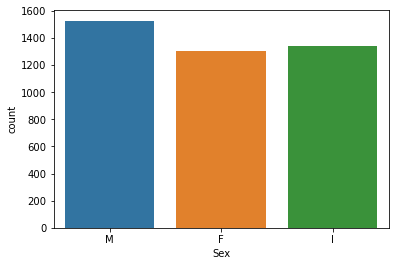

In [28]:
sns.countplot(x='Sex',data=data)
plt.show()

In [29]:
data.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
ord_enc=OrdinalEncoder(categories=[['I','M','F']])
df1=ord_enc.fit_transform(data[['Sex']])
df1

array([[1.],
       [1.],
       [2.],
       ...,
       [1.],
       [2.],
       [1.]])

In [32]:
data['Sex']=df1
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [36]:
x =data.drop(columns=['Rings'])
y=np.where(data['Rings']>10,1,0)

In [37]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,2.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


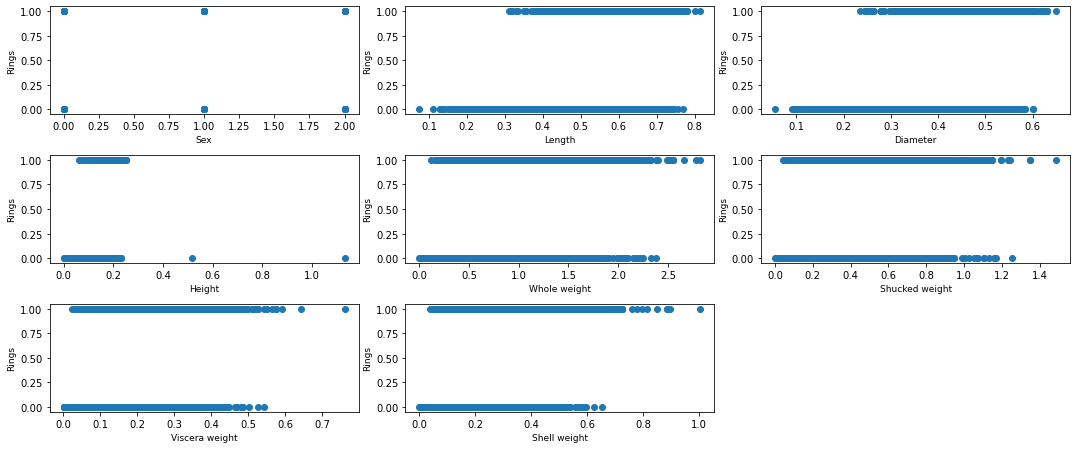

In [40]:
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=12:
        ax= plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=9)
        plt.ylabel('Rings',fontsize=9)      
        
    plotnumber+=1
plt.tight_layout()

In [41]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,0.503697,0.516450,0.477850,0.501511,0.459731,0.505693,0.499103,0.401445
Length,0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


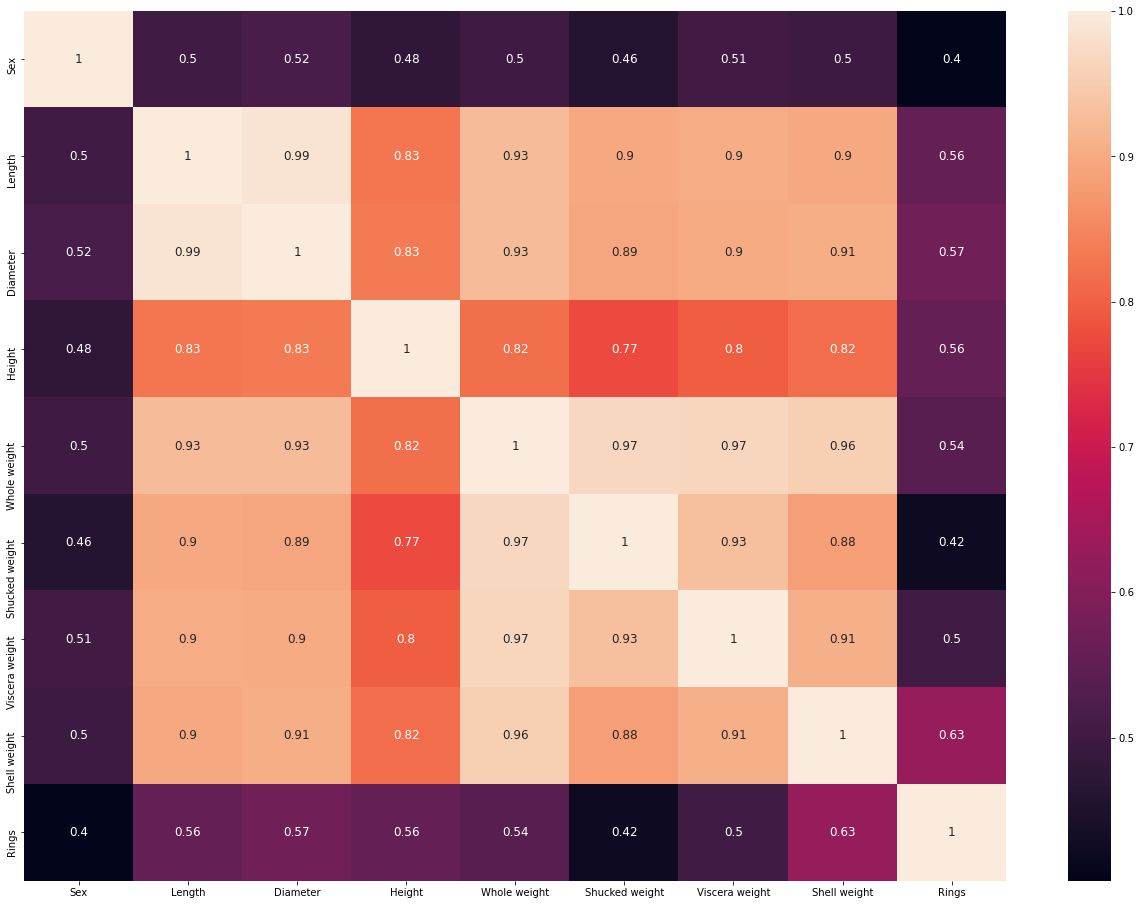

In [42]:
plt.figure(figsize=(22,16))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12}) 
plt.show()

In [44]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.991621,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


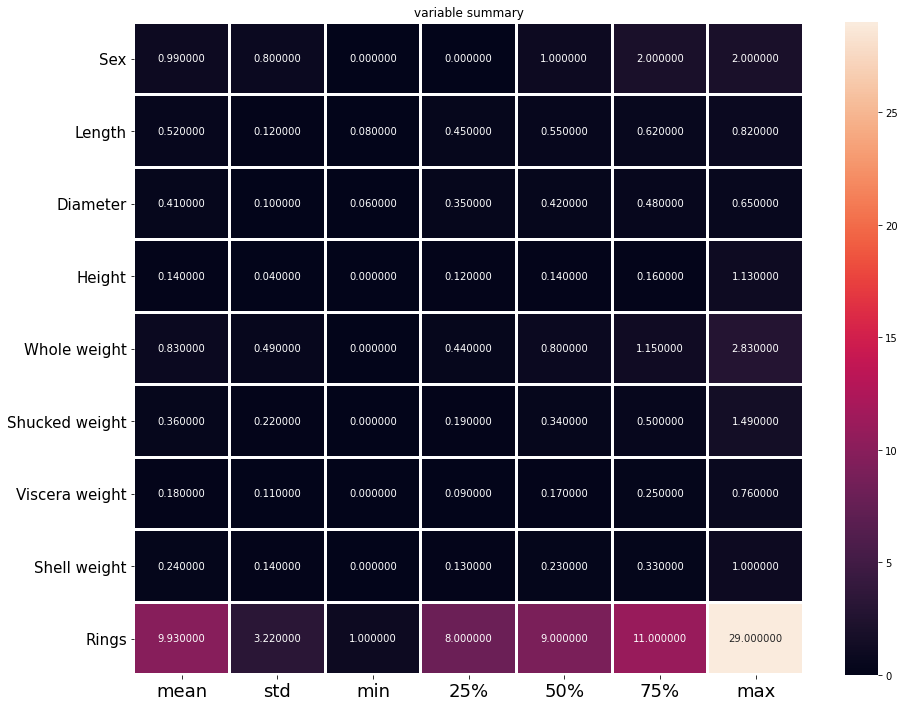

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f") 
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.title("variable summary")
plt.show()

In [46]:
print('Shape         ********',data.shape)
print('Each column and data type','\n')
print(data.info())

Shape         ******** (4177, 9)
Each column and data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB
None


In [47]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [48]:
data.duplicated().sum()

0

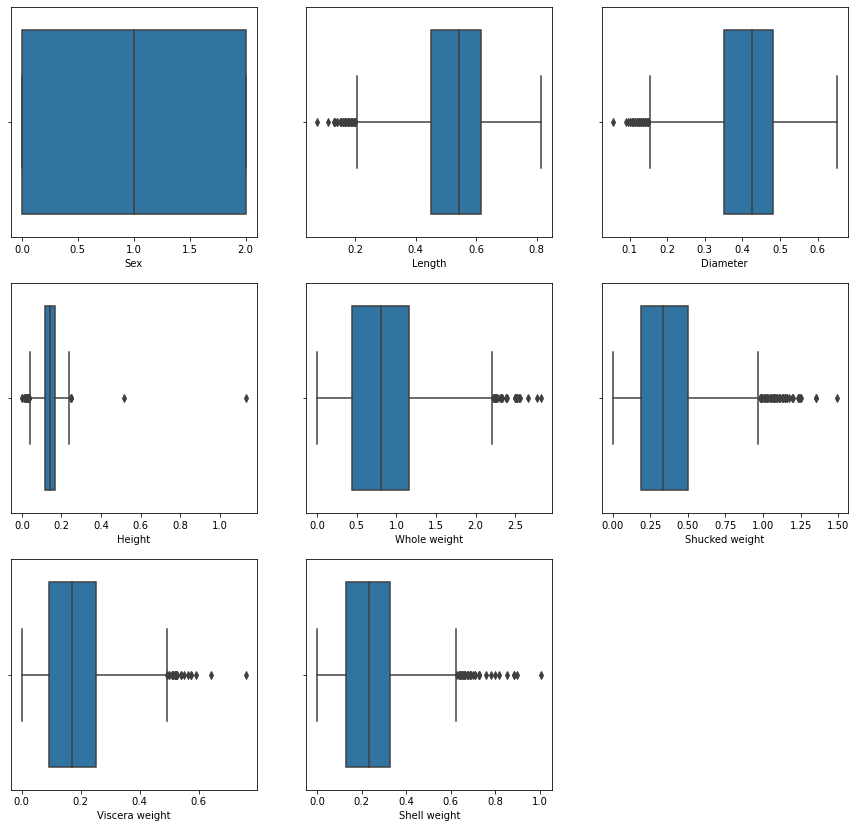

In [49]:
plt.figure(figsize=(15,50))

graph=1

for column in X:
    if plotnumber<=30:  
        ax= plt.subplot(10,3,graph)
        sns.boxplot(X[column],orient='v')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()

In [50]:
data.skew()

Sex               0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

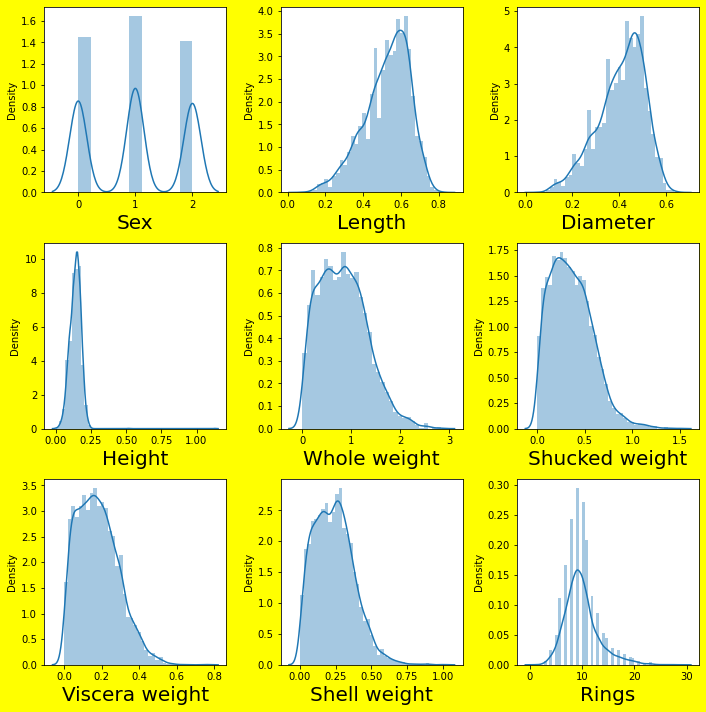

In [52]:
plt.figure(figsize=(10,10),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=9:  #as there are 9 columns in the data 
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

In [53]:
from scipy.stats import zscore  

z_score=zscore(data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]) #  dont apply on catogorical data 
abs_z_score =np.abs(z_score) #apply the formula and get the scaled data


filtering_entry =(abs_z_score<3).all(axis=1)

data=data[filtering_entry]

data.reset_index()

data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000,4084.000000
mean,0.988247,0.522090,0.406308,0.138530,0.808404,0.350172,0.176579,0.233142,9.901567
std,0.798209,0.115709,0.095848,0.037001,0.457321,0.205827,0.103336,0.129482,3.164617
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441000,0.185375,0.092875,0.130000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.790750,0.332000,0.168500,0.230000,9.000000
75%,2.000000,0.610000,0.480000,0.165000,1.134750,0.494000,0.247000,0.320500,11.000000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,29.000000


In [54]:
loss_percent =(4177-4084)/4084*100
print(loss_percent)

2.277179236043095


In [55]:
data.skew()

Sex               0.021071
Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
dtype: float64

In [56]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')

In [57]:
X

array([[ 0.09501059, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 0.09501059, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 1.21429657, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.09501059,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 1.21429657,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 0.09501059,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

In [58]:
scaler = StandardScaler()

X= scaler.fit_transform(X)

In [59]:
X

array([[ 0.09501059, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 0.09501059, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 1.21429657, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.09501059,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 1.21429657,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 0.09501059,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

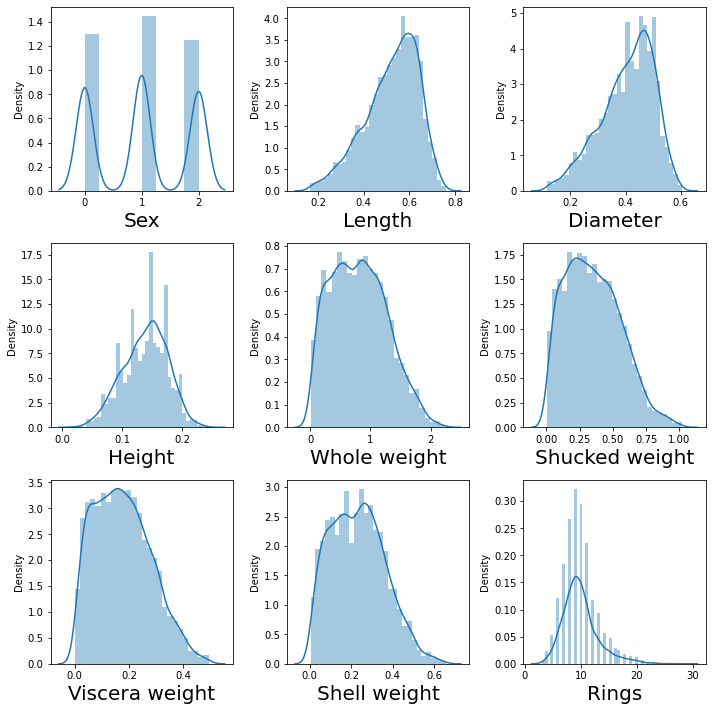

In [61]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in data:
    if plotnumber<=9: 
        ax= plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
        
    plotnumber+=1
plt.tight_layout()

In [62]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [63]:
X

array([[ 0.09501059, -0.68550213, -0.54986033, ..., -0.54098937,
        -0.69328289, -0.587809  ],
       [ 0.09501059, -1.39634403, -1.38733299, ..., -1.31166208,
        -1.33295268, -1.33241968],
       [ 1.21429657, -0.07077438,  0.00853714, ..., -0.36611642,
        -0.25513514, -0.09826193],
       ...,
       [ 0.09501059,  0.59336612,  0.64519089, ...,  0.83813658,
         1.01560749,  0.59839786],
       [ 1.21429657,  0.85337516,  0.76992788, ...,  0.85873857,
         0.81518436,  0.51914542],
       [ 0.09501059,  1.83447784,  1.72628889, ...,  2.10364827,
         1.61134422,  1.65848824]])

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [65]:
from sklearn.metrics import plot_roc_curve

In [66]:
def print_score(clf,x_train,x_test,y_train,y_test, train=True): # Classifier-?? i dont which classifier pass
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n**************Train Result****************")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred =clf.predict(x_test)
        
        print("\n**************Test Result*****************")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print ('\n \n  Test Classification Report \n', classification_report(y_test,pred,digits=2))

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test, train=True)

print_score (lr,x_train,x_test,y_train,y_test, train=False)


**************Train Result****************
Accuracy Score: 79.02%

**************Test Result*****************
Accuracy Score: 78.46%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       923
           1       0.70      0.61      0.65       456

    accuracy                           0.78      1379
   macro avg       0.76      0.74      0.75      1379
weighted avg       0.78      0.78      0.78      1379



In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test, train=True)

print_score (dt,x_train,x_test,y_train,y_test, train=False)


**************Train Result****************
Accuracy Score: 100.00%

**************Test Result*****************
Accuracy Score: 74.47%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       923
           1       0.61      0.64      0.62       456

    accuracy                           0.74      1379
   macro avg       0.71      0.72      0.72      1379
weighted avg       0.75      0.74      0.75      1379



In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)

print_score(rf,x_train,x_test,y_train,y_test, train=True)

print_score (rf,x_train,x_test,y_train,y_test, train=False)


**************Train Result****************
Accuracy Score: 100.00%

**************Test Result*****************
Accuracy Score: 78.39%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       923
           1       0.68      0.64      0.66       456

    accuracy                           0.78      1379
   macro avg       0.76      0.75      0.75      1379
weighted avg       0.78      0.78      0.78      1379



In [70]:
from sklearn.svm import SVC
svc=SVC()
 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


**************Train Result****************
Accuracy Score: 79.84%

**************Test Result*****************
Accuracy Score: 79.41%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       923
           1       0.70      0.66      0.68       456

    accuracy                           0.79      1379
   macro avg       0.77      0.76      0.76      1379
weighted avg       0.79      0.79      0.79      1379



In [71]:
from sklearn.model_selection import cross_val_score 

In [72]:
scr=cross_val_score(lr,X,y,cv=5)
print('Cross valdation score of SVC Model:',scr.mean())

Cross valdation score of SVC Model: 0.7874030885597226


In [73]:
scr=cross_val_score(dt,X,y,cv=5)
print('Cross valdation score of Decision Tree Model:',scr.mean())

Cross valdation score of Decision Tree Model: 0.6995421596997393


In [74]:
scr=cross_val_score(rf,X,y,cv=5)
print('Cross valdation score of Random Forest Model:',scr.mean())

Cross valdation score of Random Forest Model: 0.7708864567515686


In [75]:
scr=cross_val_score(svc,X,y,cv=5)
print('Cross valdation score of SVC Model:',scr.mean())

Cross valdation score of SVC Model: 0.7821425092398935


In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [80]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]    
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=5)


In [82]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [83]:
grid_svc.best_estimator_

SVC(C=1.2, gamma=0.1, kernel='linear')

In [84]:
svc=SVC(C=1.2, gamma=0.1, kernel='linear')
 
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)

print_score (svc,x_train,x_test,y_train,y_test, train=False)


**************Train Result****************
Accuracy Score: 79.52%

**************Test Result*****************
Accuracy Score: 78.68%

 
  Test Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       923
           1       0.71      0.61      0.65       456

    accuracy                           0.79      1379
   macro avg       0.76      0.74      0.75      1379
weighted avg       0.78      0.79      0.78      1379



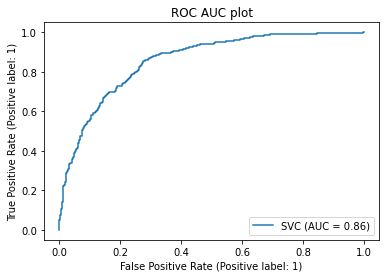

In [85]:
plot_roc_curve(grid_svc.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [ ]:
#conclusion

In [87]:
import joblib
joblib.dump(grid_svc.best_estimator_,"abalone.pkl")

import numpy as np
a=np.array(y_test)
predicted =np.array(svc.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com

,original,predicted
0,0,1
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
1374,0,0
1375,0,0
1376,0,0
1377,0,0


In [ ]:
since model gives error